In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# load in dataframe
df = pd.read_csv('../Data/train.csv')

In [3]:
# Define Variables
x = df[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']]
df['LogSalePrice'] = np.log(df['SalePrice'])
y = df['LogSalePrice']
print(x)
print(y)

      OverallQual  GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF
0               7       1710         548          856       856
1               6       1262         460         1262      1262
2               7       1786         608          920       920
3               7       1717         642          756       961
4               8       2198         836         1145      1145
...           ...        ...         ...          ...       ...
1455            6       1647         460          953       953
1456            6       2073         500         1542      2073
1457            7       2340         252         1152      1188
1458            5       1078         240         1078      1078
1459            5       1256         276         1256      1256

[1460 rows x 5 columns]
0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: Log

In [4]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [5]:
# Random forest regression model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, max_depth = None, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

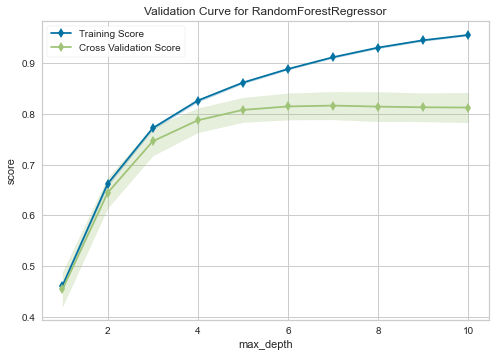

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_depth', ylabel='score'>

In [6]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)
viz.fit(x, y)
viz.show()
# training score: r squared for training set
# cross validation score: r squared for test set (ValidationCurve() automatically splits it)
# max depth of 5 is best: before, training score is low (underfitting); after, training score is significantly
# higher than cross validation score (overfitting)

In [7]:
# Update the random forest regression
updated_regressor = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 0)
updated_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [8]:
# Predict the test set results
y_pred = updated_regressor.predict(x_test)

In [9]:
# Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8345064711023737

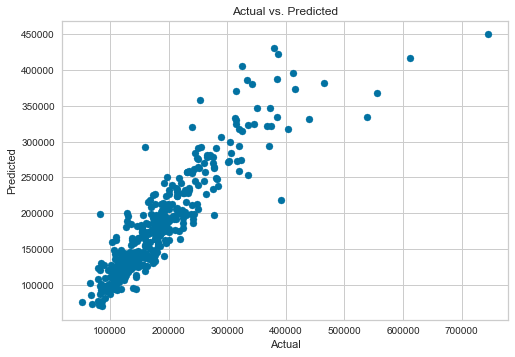

In [10]:
# Plot the results
plt.scatter(np.exp(y_test), np.exp(y_pred))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

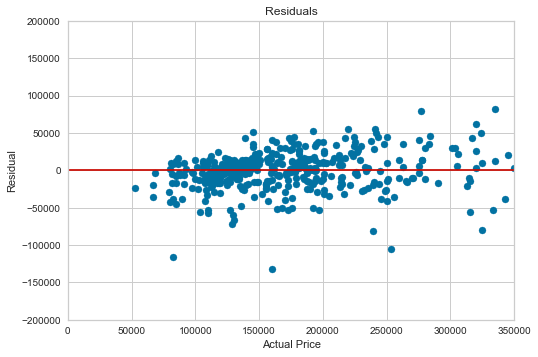

In [11]:
y_test2 = np.exp(y_test)
y_pred2 = np.exp(y_pred)
resid = y_test2 - y_pred2
plt.scatter(y_test2, resid)
plt.title('Residuals')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlim([0, 350000])
plt.ylim([-200000,200000])
plt.show()

In [12]:
test_df = pd.read_csv('../Data/test.csv')
test_vars = test_df[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']].fillna(0)
pred = regressor.predict(test_vars)
pred = np.exp(pred)
pred = pred.tolist()
submission = pd.DataFrame({'ID': test_df['Id'], 'SalePrice': pred})
submission

,ID,SalePrice
0,1461,127547.024218
1,1462,148326.439849
2,1463,143231.088139
3,1464,179345.670131
4,1465,216841.212924
...,...,...
1454,2915,70638.414102
1455,2916,80908.542108
1456,2917,154806.648488
1457,2918,104523.820820


In [13]:
submission.to_csv('submission.csv', index = False)